In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import textwrap
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split

In [10]:
# Import file and load in dataframe
#------------------------------------------------------------
file ='bbc_text_cls.csv'
# Load the CSV file into a DataFrame
df = pd.read_csv(file, encoding="ISO-8859-1")

In [54]:
# Define stopwords scope
stop_words = list(set(stopwords.words('english')))
stop_words = stop_words + ['said', 'would', 'could', 'told', 'also', 'one', 'two', 'mr', 'new', 'year'] # based on observations        

In [55]:
# Split Train Vs Test
test_size = 0.2
X_train, X_test = train_test_split(df['text'], test_size=test_size, random_state=34)
print("Number of Train docs = ",df.shape[0]*(1-test_size))
# Count Vectorize Train docs
vectorizer = CountVectorizer(decode_error='ignore', stop_words=stop_words)
X = vectorizer.fit_transform(X_train)
# LDA for train-vectors
n_components=8
learning_decay=0.6
batch_size=64
lda = LatentDirichletAllocation(n_components=n_components, learning_decay=learning_decay, batch_size=batch_size, random_state=120)
lda.fit(X) # if it was supervised learning we would do fit(X,Y)
Z = lda.transform(X) # returns {docs x topics} matrix
topics = lda.components_
print("lda.components_: topics x words = ",topics.shape)
print("lda.transform: docs x topics = ",Z.shape)

Number of Train docs =  1780.0
lda.components_: topics x words =  (8, 26878)
lda.transform: docs x topics =  (1780, 8)


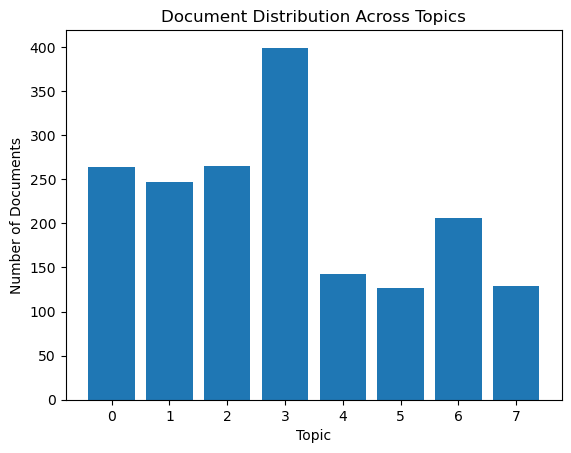

In [60]:
# Group docs into topics based on highest probability
topics_per_doc = np.argmax(Z, axis=1)
# Count the occurrences of each topic
topic_counts = np.bincount(topics_per_doc)
# Create an array of topic labels
topic_labels = np.arange(len(topic_counts))
# Create a bar chart
plt.bar(topic_labels, topic_counts)
# Set labels and a title
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.title('Document Distribution Across Topics')
# Save the chart as an image file
plt.savefig(fname="docs_per_topic.png",bbox_inches='tight', format='png')
# Display the plot
plt.show()

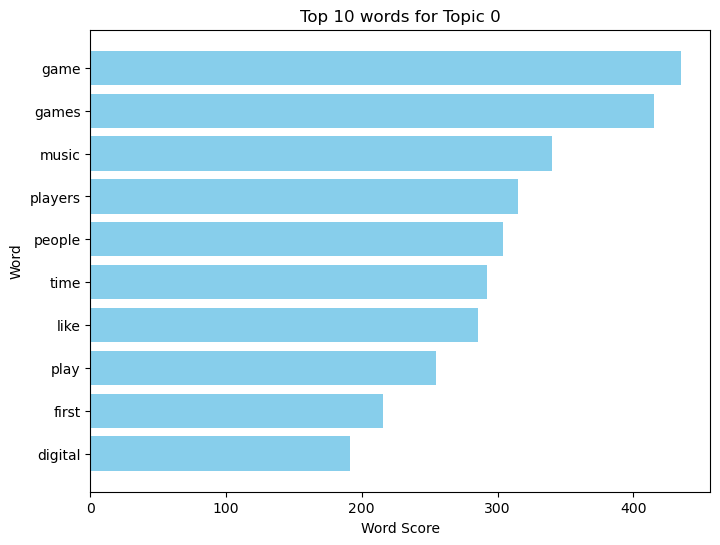

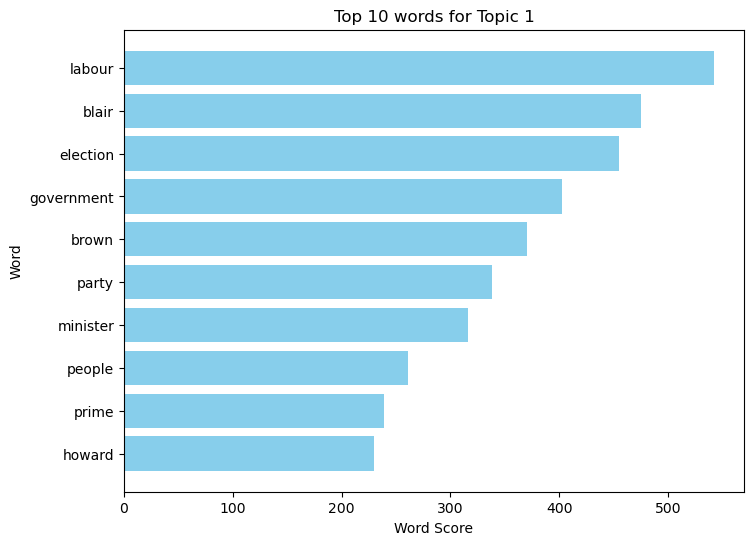

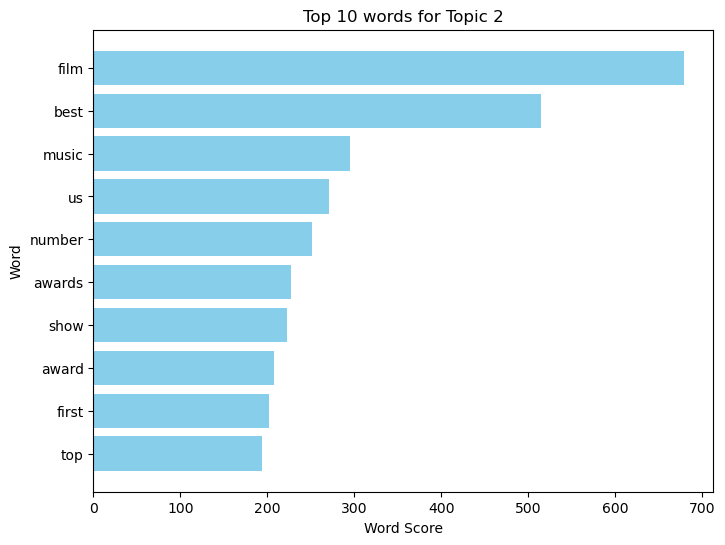

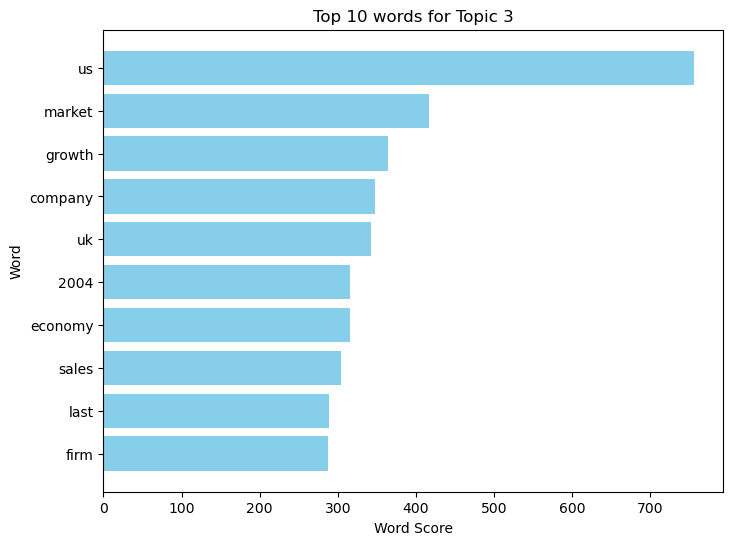

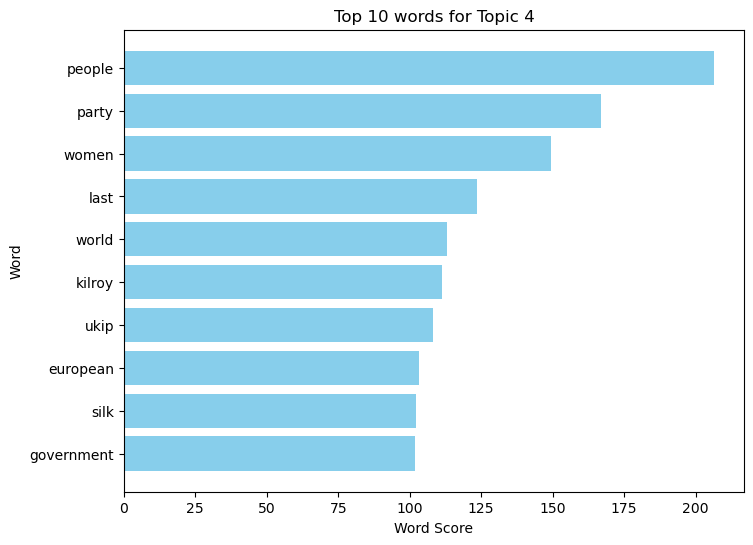

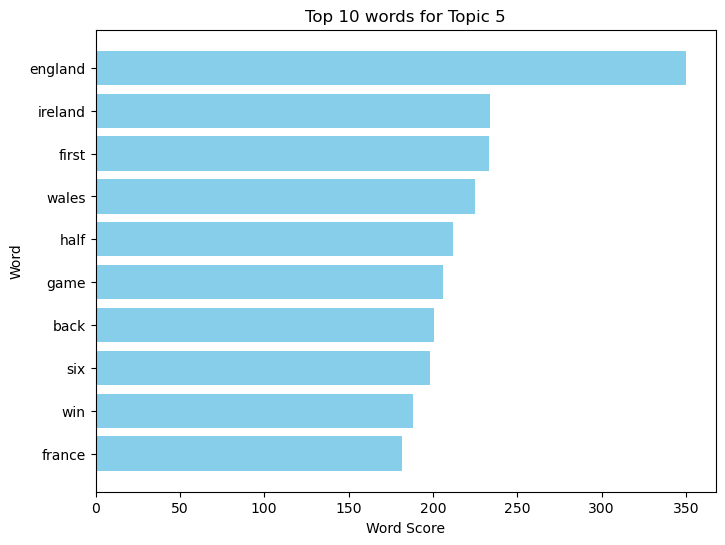

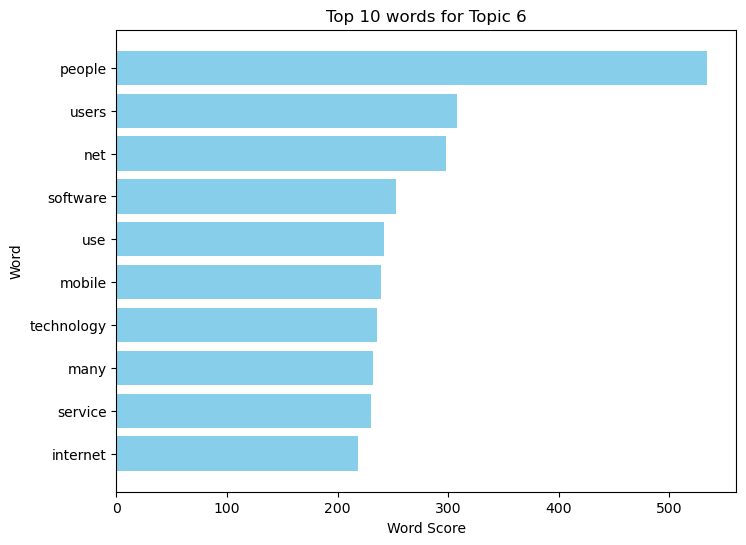

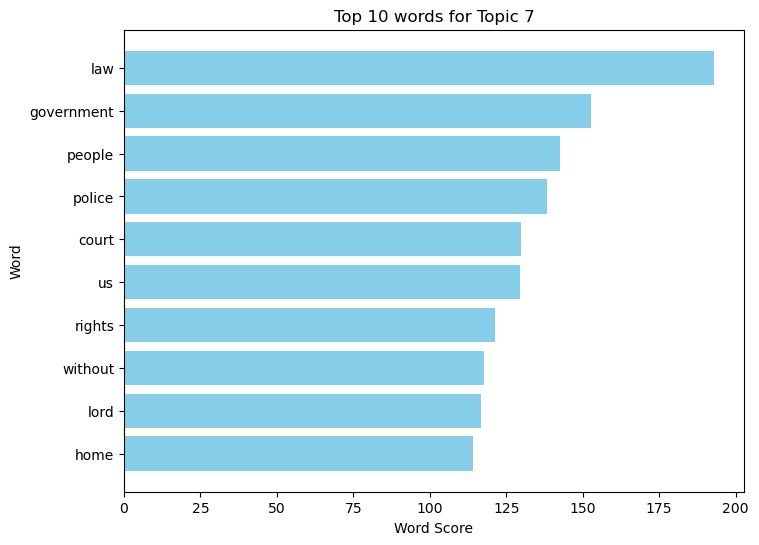

In [59]:
# Get the feature names (words) from the CountVectorizer
feature_names = np.array(vectorizer.get_feature_names_out()) # mapped words to topics array indices
# Get the top N words for each topic
top_n_words = 10  # You can change this number as needed
for topic_idx, topic in enumerate(topics):
    top_words_idx = topic.argsort()[-top_n_words:][::-1]
    top_words = feature_names[top_words_idx]
    top_scores = topic[top_words_idx]

    # Create a bar chart for each topic
    plt.figure(figsize=(8, 6))
    plt.barh(top_words, top_scores, color='skyblue')
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.title(f'Top {top_n_words} words for Topic {topic_idx}')
    plt.xlabel('Word Score')
    plt.ylabel('Word')
    # Save the chart as an image file
    plt.savefig(fname="components",bbox_inches='tight', format='png')
    # Display
    plt.show()